In [ ]:
# Climate Change Data Analysis (2000-2020)

This notebook analyzes climate-related data over the years 2000 to 2020, including temperature, CO2 emissions, sea level rise, precipitation, humidity, and wind speed.  
The goal is to observe trends and understand how these variables have changed over time.

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df=pd.read_csv("C:\\Users\\siman\\Downloads\\archive\\climate_change_data.csv")

In [5]:
df.head()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164


In [ ]:
## Data Summary

The dataset includes the following columns:

- **Year**: The year of the data record.
- **Temperature**: Average global temperature (°C).
- **CO2 Emissions**: Carbon dioxide emissions (ppm).
- **Sea Level Rise**: Sea level rise in meters.
- **Precipitation**: Average precipitation (mm).
- **Humidity**: Average humidity (%).
- **Wind Speed**: Average wind speed (km/h).



In [7]:
df.shape


(10000, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            10000 non-null  object 
 1   Location        10000 non-null  object 
 2   Country         10000 non-null  object 
 3   Temperature     10000 non-null  float64
 4   CO2 Emissions   10000 non-null  float64
 5   Sea Level Rise  10000 non-null  float64
 6   Precipitation   10000 non-null  float64
 7   Humidity        10000 non-null  float64
 8   Wind Speed      10000 non-null  float64
dtypes: float64(6), object(3)
memory usage: 703.3+ KB


In [10]:
pd.isnull(df)

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False


In [11]:
pd.isnull(df).sum()

Date              0
Location          0
Country           0
Temperature       0
CO2 Emissions     0
Sea Level Rise    0
Precipitation     0
Humidity          0
Wind Speed        0
dtype: int64

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


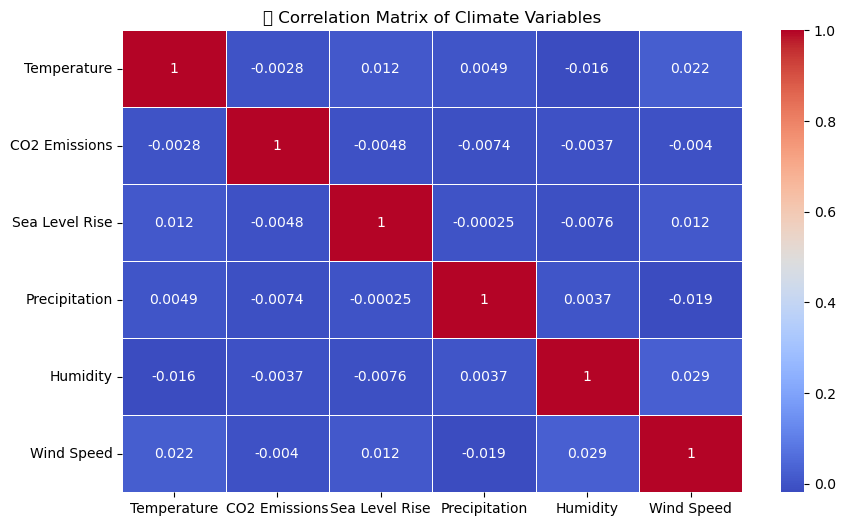

In [12]:

climate_vars = df[['Temperature', 'CO2 Emissions', 'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed']]

correlation_matrix = climate_vars.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("📊 Correlation Matrix of Climate Variables")
plt.show()


In [ ]:
## Correlation Matrix of Climate Variables

The heatmap below shows the correlation coefficients between different climate variables:

- Values close to **1** or **-1** indicate a strong positive or negative correlation, respectively.
- Values near **0** suggest little to no linear relationship.

This helps us understand how variables like temperature, CO2 emissions, sea level rise, precipitation, humidity, and wind speed relate to each other.


C:\Users\siman\AppData\Local\Temp\ipykernel_24140\1674712463.py:20: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\siman\AppData\Local\Temp\ipykernel_24140\1674712463.py:20: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\siman\AppData\Local\Temp\ipykernel_24140\1674712463.py:20: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\siman\AppData\Local\Temp\ipykernel_24140\1674712463.py:20: UserWarning: Glyph 127787 (\N{FOG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\siman\AppData\Local\Temp\ipykernel_24140\1674712463.py:20: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from font(s) Arial.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Pro

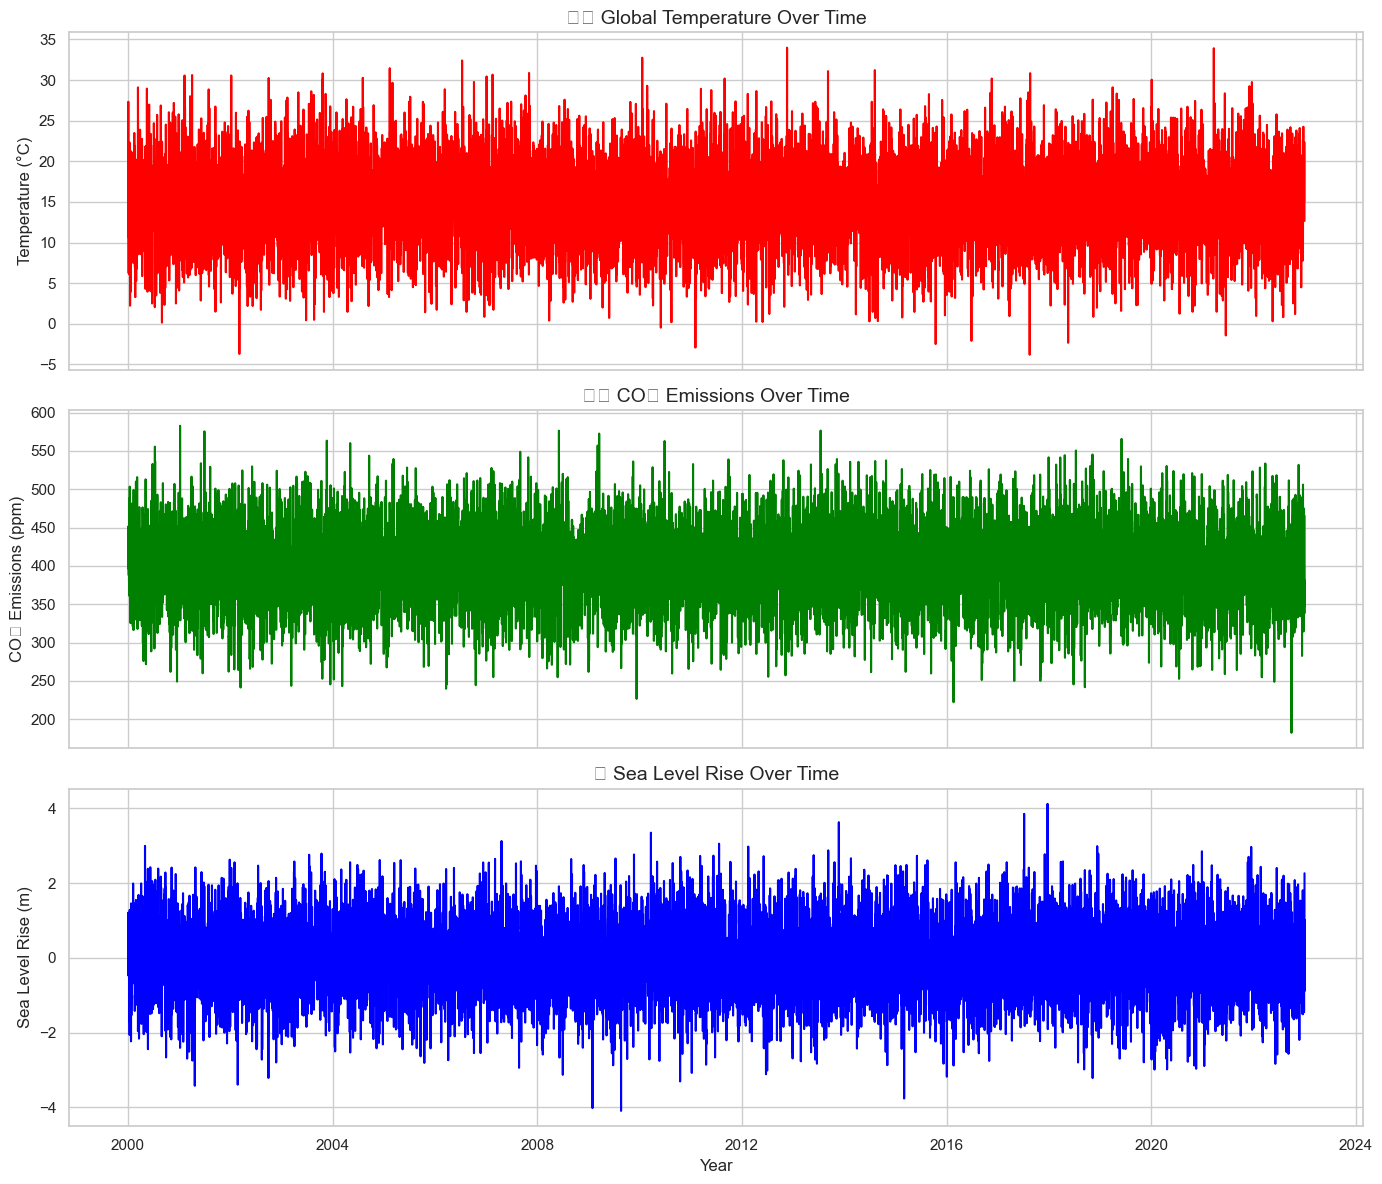

In [14]:

df['Date'] = pd.to_datetime(df['Date'])

sns.set(style="whitegrid")

fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

sns.lineplot(ax=axes[0], x='Date', y='Temperature', data=df, color='red')
axes[0].set_title("🌡️ Global Temperature Over Time", fontsize=14)
axes[0].set_ylabel("Temperature (°C)")

sns.lineplot(ax=axes[1], x='Date', y='CO2 Emissions', data=df, color='green')
axes[1].set_title("🌫️ CO₂ Emissions Over Time", fontsize=14)
axes[1].set_ylabel("CO₂ Emissions (ppm)")

sns.lineplot(ax=axes[2], x='Date', y='Sea Level Rise', data=df, color='blue')
axes[2].set_title("🌊 Sea Level Rise Over Time", fontsize=14)
axes[2].set_ylabel("Sea Level Rise (m)")
axes[2].set_xlabel("Year")

plt.tight_layout()
plt.show()


In [16]:
correlation_matrix = climate_vars.corr()


In [26]:
df.head()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,Year
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026,2000
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300,2000
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261,2000
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563,2000
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164,2000


In [29]:
print(df.select_dtypes(include=['number']).columns)


Index(['Temperature', 'CO2 Emissions', 'Sea Level Rise', 'Precipitation',
       'Humidity', 'Wind Speed', 'Year'],
      dtype='object')


In [30]:
numeric_cols = ['Temperature', 'CO2 Emissions', 'Sea Level Rise', 'Precipitation',
                'Humidity', 'Wind Speed']
yearly_data = df.groupby('Year')[numeric_cols].mean().reset_index()
print(yearly_data.head())


   Year  Temperature  CO2 Emissions  Sea Level Rise  Precipitation   Humidity  \
0  2000    15.029889     402.903439        0.066779      51.407407  50.453059   
1  2001    14.941470     399.301274        0.021331      48.523241  47.426700   
2  2002    14.632097     395.342856       -0.103499      49.874793  50.576568   
3  2003    15.156629     399.121797        0.033171      49.919233  50.505277   
4  2004    15.281254     402.220557        0.098114      49.702290  47.685909   

   Wind Speed  
0   26.120326  
1   25.446752  
2   25.321959  
3   25.484460  
4   24.220221  


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

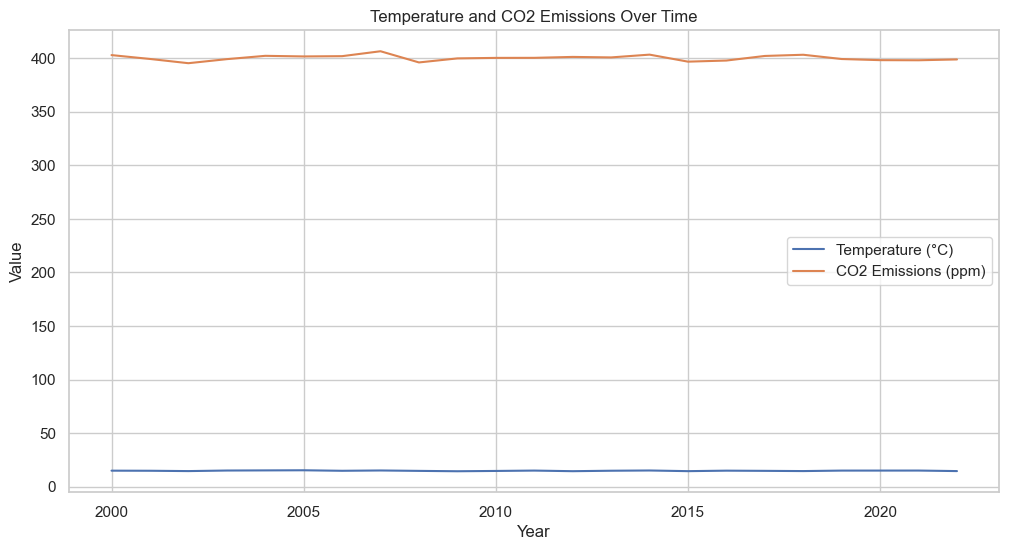

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(yearly_data['Year'], yearly_data['Temperature'], label='Temperature (°C)')
plt.plot(yearly_data['Year'], yearly_data['CO2 Emissions'], label='CO2 Emissions (ppm)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Temperature and CO2 Emissions Over Time')
plt.legend()
plt.show()


In [ ]:
#Temperature and CO2 Emissions Over Time 📈
This line chart shows the trend of global temperature (in °C) and CO2 emissions (in parts per million) over the years.

The red and blue lines represent the changes in temperature and CO2 emissions, respectively.

It helps us visualize how both variables have evolved over time and explore potential correlations.



In [32]:
corr = yearly_data[['Temperature', 'CO2 Emissions', 'Sea Level Rise']].corr()
print(corr)


                Temperature  CO2 Emissions  Sea Level Rise
Temperature        1.000000       0.340404        0.312507
CO2 Emissions      0.340404       1.000000        0.640432
Sea Level Rise     0.312507       0.640432        1.000000


In [33]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = yearly_data['Year'].values.reshape(-1,1)
y = yearly_data['Temperature'].values

model = LinearRegression()
model.fit(X, y)

print(f"Temperature trend per year: {model.coef_[0]:.4f} °C/year")


Temperature trend per year: -0.0064 °C/year


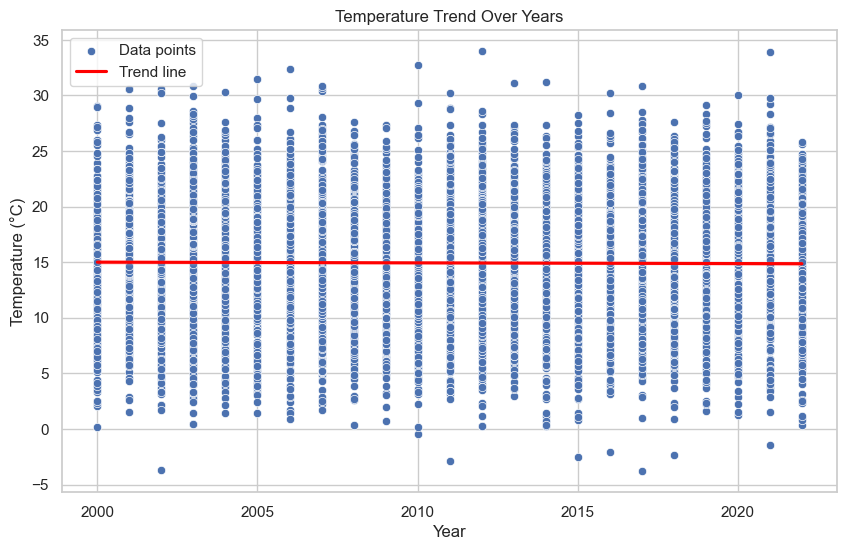

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))


sns.scatterplot(data=df, x='Year', y='Temperature', label='Data points')

sns.regplot(data=df, x='Year', y='Temperature', scatter=False, color='red', label='Trend line')

plt.title('Temperature Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


In [ ]:
#Temperature Trend Over Years 🔴📉
This scatter plot shows individual temperature data points for each year.
The red trend line (regression line) highlights the overall direction of temperature change over time, helping us see if temperatures are generally rising or falling across the years.
## Conclusion

The linear regression analysis of the temperature data shows a trend of approximately -0.0064 °C per year, indicating a slight decrease in global temperature over the observed years in this dataset.

This trend is visualized by the red regression line in the scatter plot of temperature over time.

